# **Smart Building Management**

**Name:**           **Joseph Mundadan**

**Organization:**  **Entri Elevate**

**Date:**          **30/01/2025**

#  Overview of Problem Statement:
    
Estimating room occupancy is a critical task in various applications, such as energy-efficient building management, smart homes, and security systems. Traditional methods, such as cameras and manual counting, can be intrusive or inefficient. Sensor-based approaches using environmental data, such as temperature, light, sound, CO₂ levels, and motion detection, offer a more efficient and privacy-preserving alternative.

The challenge lies in accurately predicting room occupancy based on sensor data while handling variations in environmental conditions.

#  Project Objective
The objective of this project is to develop a machine learning model capable of accurately estimating room occupancy using data collected from non-intrusive environmental sensors. The model will classify occupancy levels, including scenarios with no occupants, a varying number of occupants (1, 2, or 3), and over-occupancy situations (more than 3). This solution aims to enhance smart building management by leveraging environmental data such as temperature, light, sound, CO2 levels, and PIR motion sensor readings to provide actionable insights for energy efficiency, security, and space utilization.
________________________________________
**This statement emphasizes:**

1.	The goal: Estimating room occupancy using machine learning.
   
2.	The inputs: Data from environmental sensors.
   
3.	The purpose: Applications in smart building management and optimization.

**•  Problem Scope:** Occupancy estimation typically involves predicting categories (e.g., is the room empty or not, or how many people are present).

**•  Model Performance:** Classification models like  Logistic Regression Random Forest, Gradient Boosting, SVM , Decision Tree                             Classifier handle discrete targets effectively, offering metrics like accuracy, F1-score, and confusion                            matrices for evaluation.

**•  Practical Use:** Classifying occupancy (e.g., 0, 1, 2, 3) is directly actionable in real-world applications like smart building management or HVAC control.


#  Data Description:
    
**•	Source:** UC Irvine Machine Learning Repository – Occupancy Estimation Dataset

**•	Features:**

o	Date & Time: Timestamp of the recorded data.

o	S1_Temp, S2_Temp, S3_Temp, S4_Temp: Temperature readings from four different sensors.

o	S1_Light, S2_Light, S3_Light, S4_Light: Light intensity readings from multiple locations.

o	S1_Sound, S2_Sound, S3_Sound, S4_Sound: Sound levels captured by different sensors.

o	S5_CO2: Carbon dioxide (CO₂) concentration, indicating human presence.
    
o	S5_CO2_Slope: Rate of change in CO₂ levels.
    
o	S6_PIR, S7_PIR: Passive Infrared (PIR) motion detection sensors.
    
o	Room_Occupancy_Count: The actual number of people in the room (Target Variable).


**IMPORTING LIBRARIES**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

 **IMPORTING MACHINE LEARNING LIBRARIES FOR EDA**

In [241]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from scipy.stats import boxcox
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

**IMPORTING MACHINE LEARNING CLASSIFIER LIBRARIES** 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

**IMPORTING MACHINE LEARNING EVALUATION LIBRARIES**

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

 **JOB SAVEING** 

In [16]:
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib


#  Data Collection

In [18]:
data= pd.read_csv("D:\\paython\\Occupancy_Estimation.csv")
df= pd.DataFrame(data)

In [19]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,22/12/2017,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,22/12/2017,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,22/12/2017,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,22/12/2017,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,22/12/2017,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


**SHAPE OF DATA**

In [21]:
df.shape

(10129, 19)

**INFORMATION OF THE DATA**

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

**DESCRIPTION  OF THE DATA**

In [25]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


# Data Preprocessing- Data Cleaning

**1) FIND NULL VALUES IN THE DATA**

In [28]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

**2) FIND ANY DUPLICATE DATA IN THE DATA SET**

In [30]:
df.duplicated().sum()

0

**From the details above, the date and time columns are not desperately needed for this project. Therefore, I am going to drop the date and time columns.**

**3) FIND NUMERICAL COLUMNS AND STORE IN A VARIABLE**

In [33]:
num_columns=df.select_dtypes(include=['int64','float64'])
num_columns.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


SHAPE OF DATA AFTER DROP DATE AND TIME COLUMNS

In [35]:
num_columns.shape

(10129, 17)

**4) CHECKING SKEWNESS**

In [37]:
df_skew= num_columns.skew()
df_skew

S1_Temp                  0.953613
S2_Temp                  2.355681
S3_Temp                  0.650162
S4_Temp                  0.129630
S1_Light                 1.820428
S2_Light                 2.827817
S3_Light                 2.100069
S4_Light                 1.357618
S1_Sound                 5.450448
S2_Sound                 6.881610
S3_Sound                 5.994767
S4_Sound                10.952134
S5_CO2                   1.975692
S5_CO2_Slope             0.287967
S6_PIR                   2.862811
S7_PIR                   3.107460
Room_Occupancy_Count     2.057635
dtype: float64

- **FEW COLUMNS ARE HIGHLY SKEWED**

**5) FIND THE OUTLIERS**

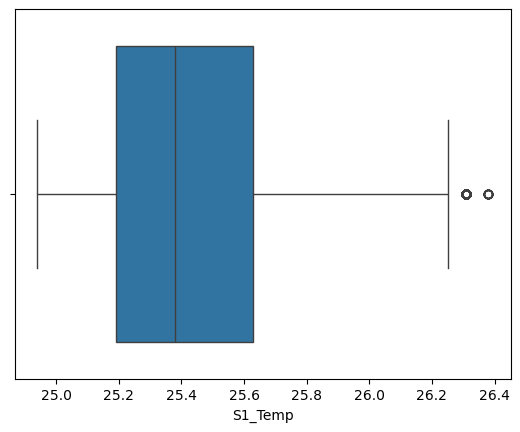

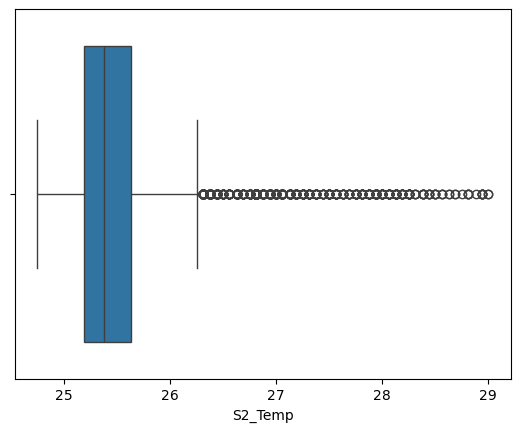

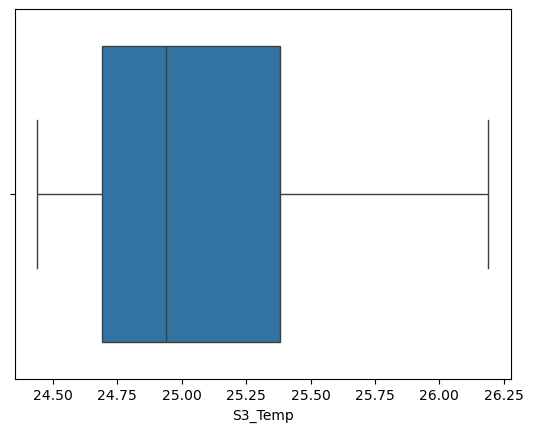

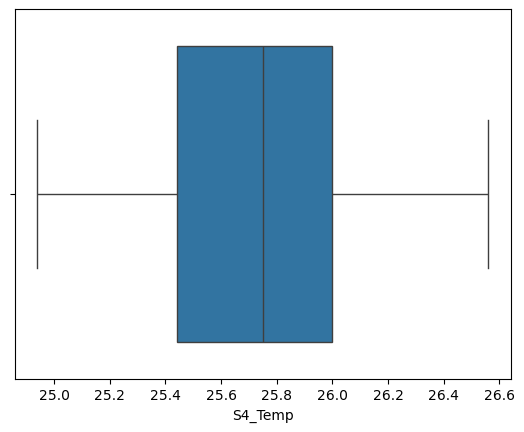

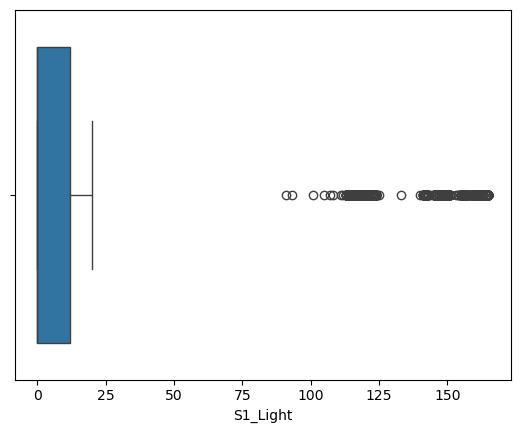

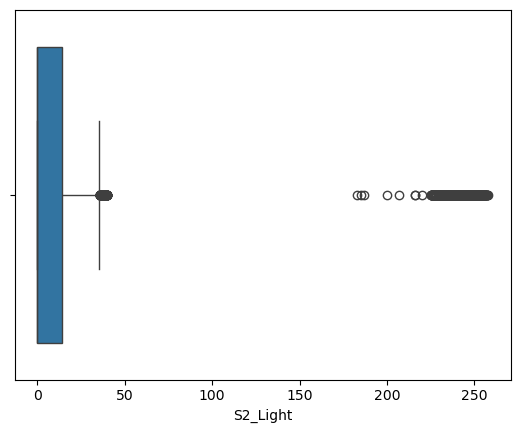

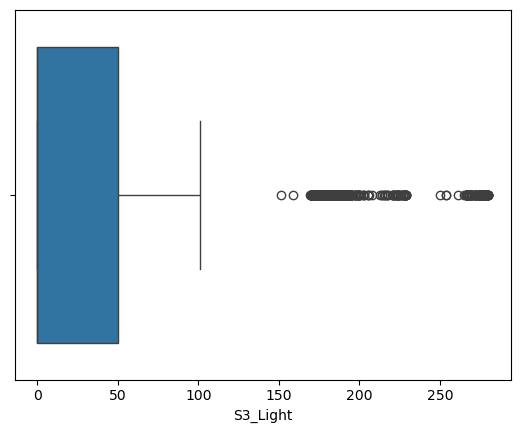

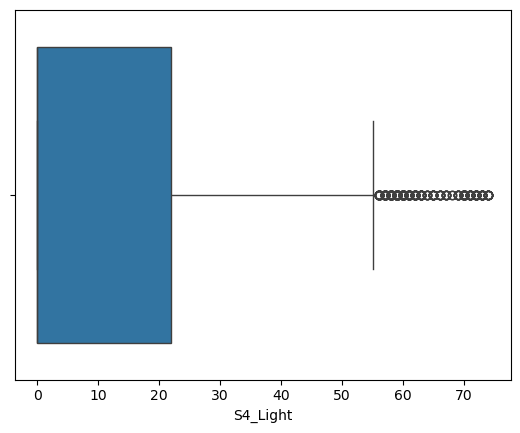

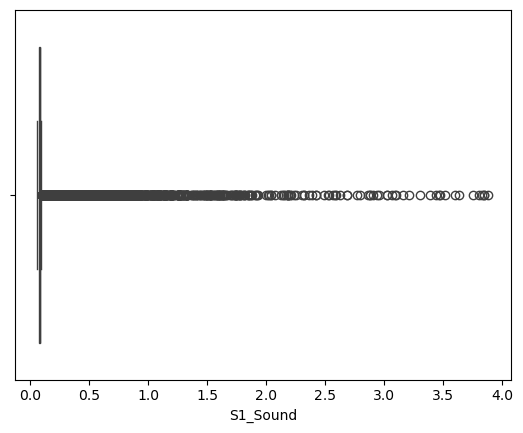

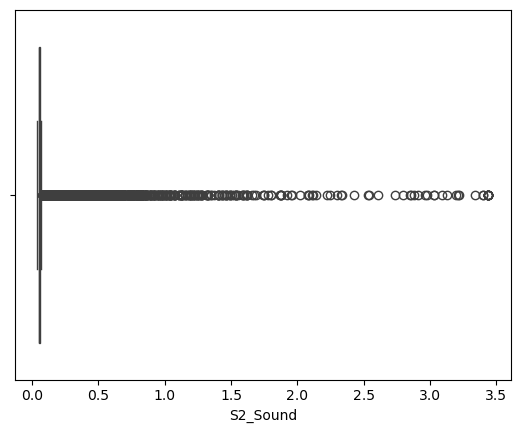

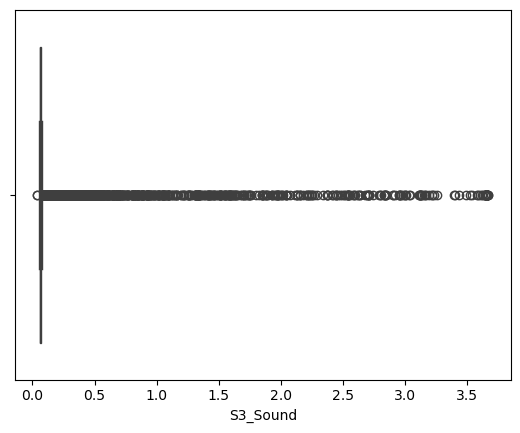

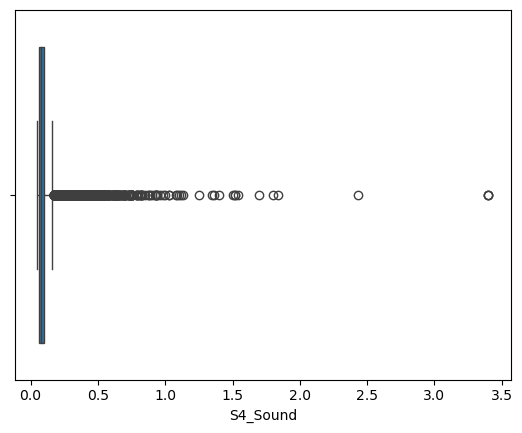

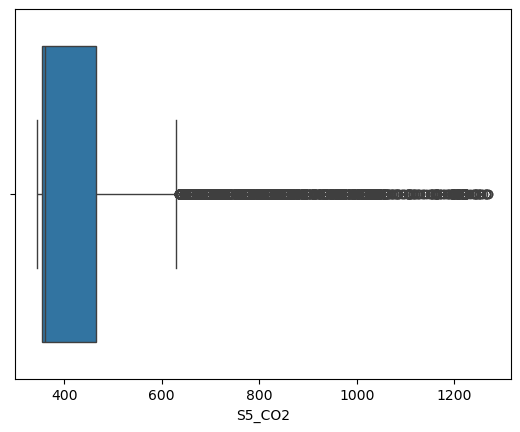

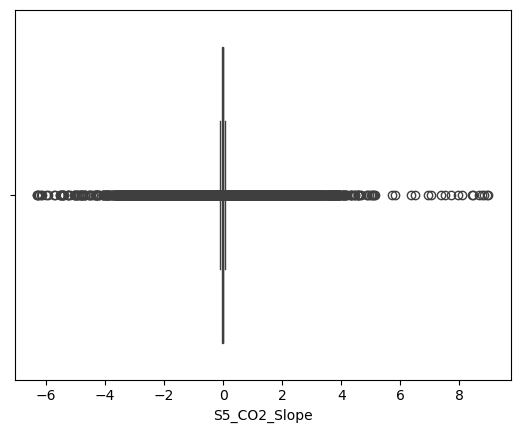

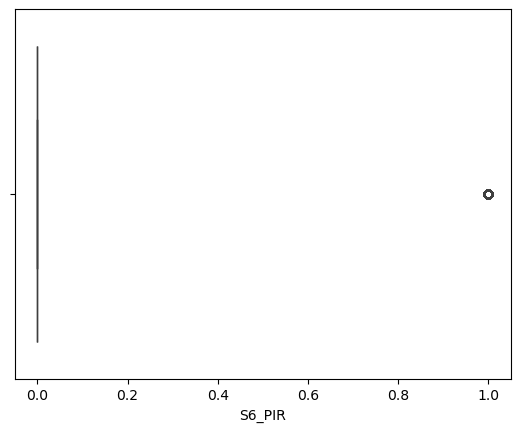

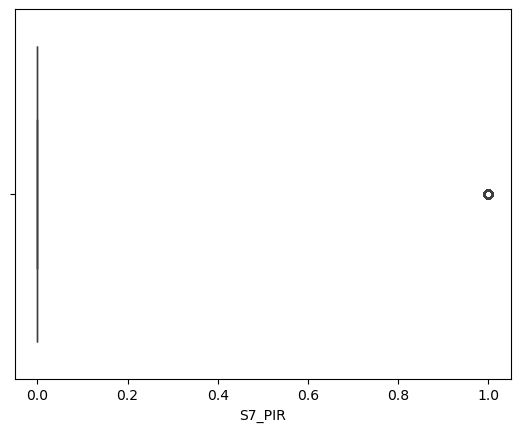

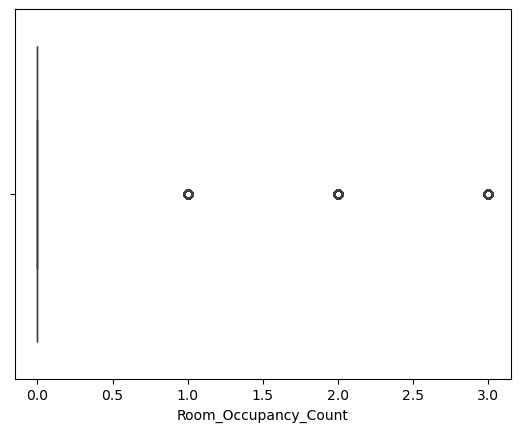

In [40]:
for i in num_columns.columns:
    sns.boxplot(data=num_columns,x=i)
    plt.show()

- **THERE IS SOME  OUTLIERS IN FEW COLUMNS**

**Apply Winsorization**

In [43]:
df1 = num_columns.apply(lambda x: winsorize(x, limits=[0.05, 0.05]))

In [44]:
df_skew= df1.skew()
df_skew

S1_Temp                 0.899270
S2_Temp                 1.514658
S3_Temp                 0.572813
S4_Temp                 0.098174
S1_Light                1.795221
S2_Light                2.817636
S3_Light                1.836163
S4_Light                1.242749
S1_Sound                2.605795
S2_Sound                2.760291
S3_Sound                3.027793
S4_Sound                2.285896
S5_CO2                  1.715803
S5_CO2_Slope            0.034607
S6_PIR                  2.862811
S7_PIR                  3.107460
Room_Occupancy_Count    2.057635
dtype: float64

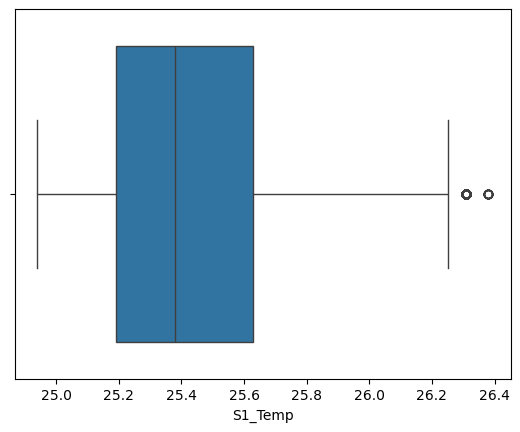

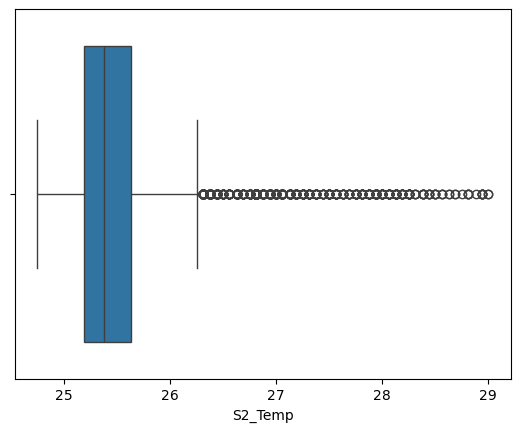

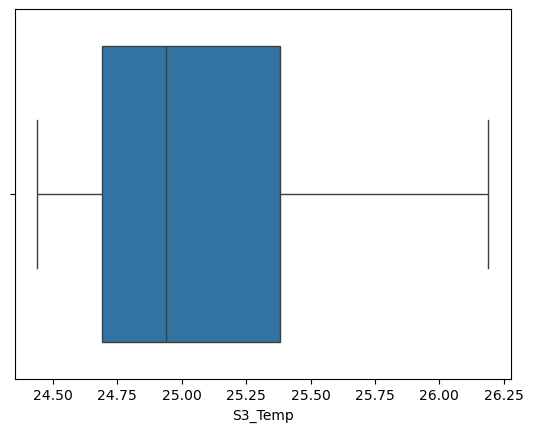

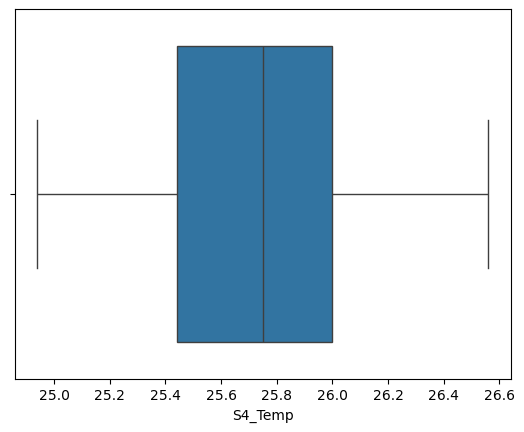

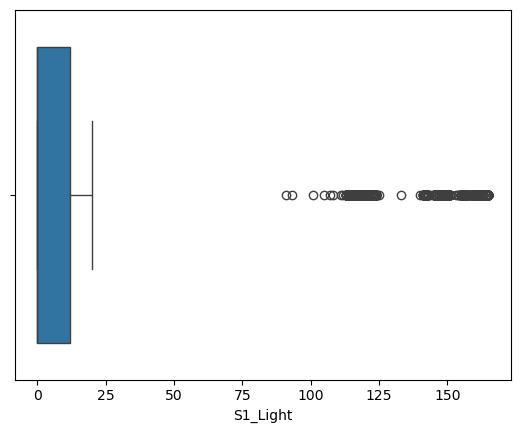

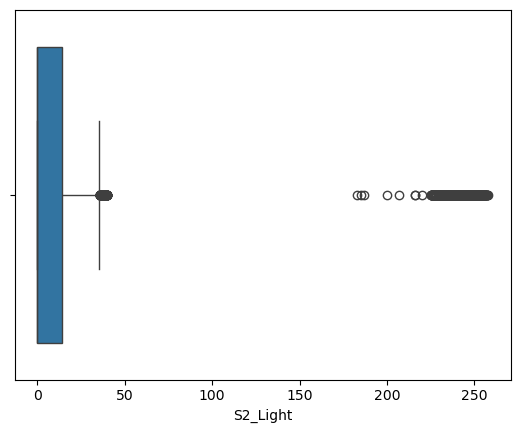

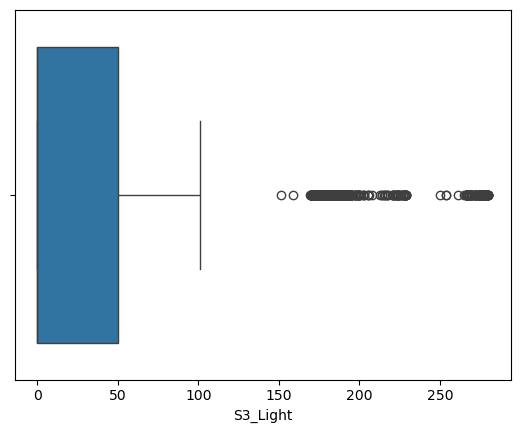

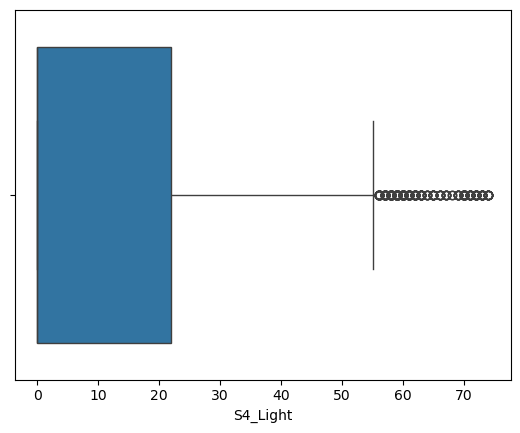

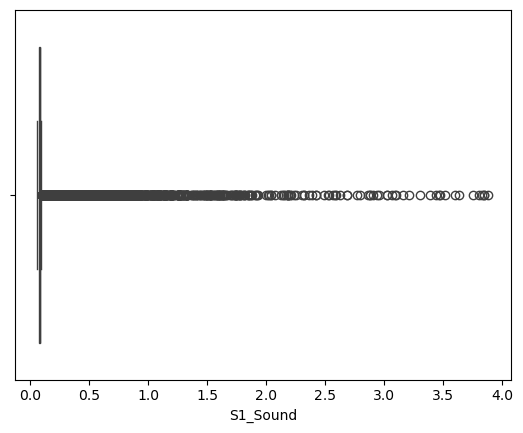

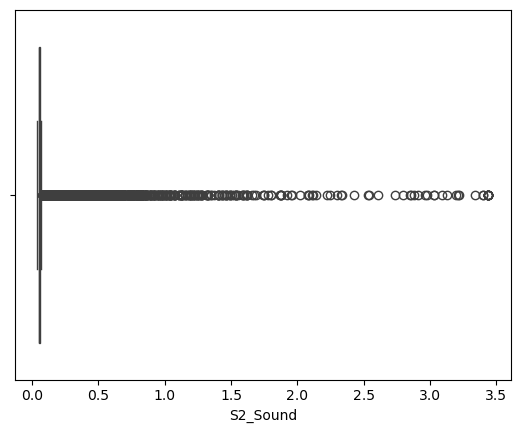

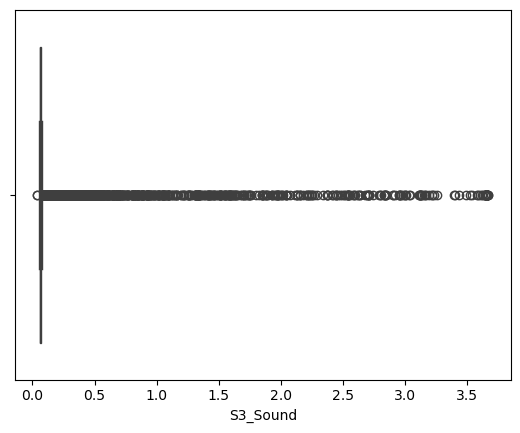

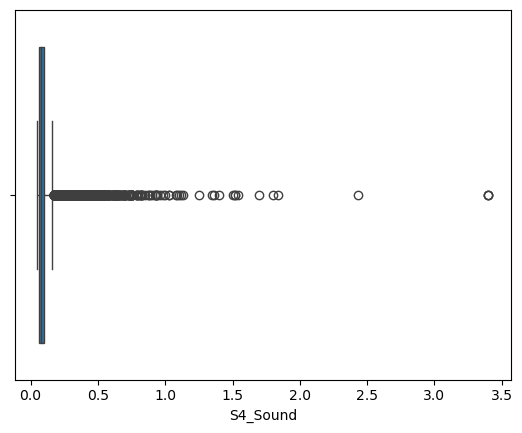

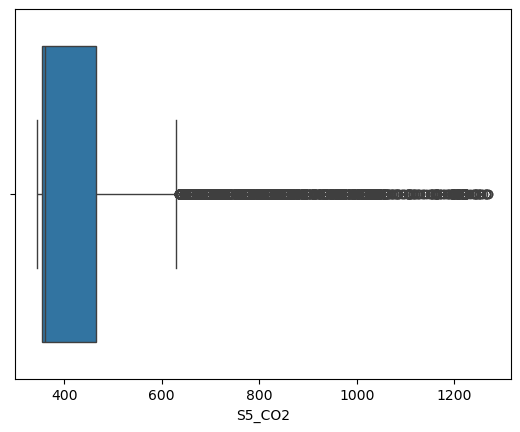

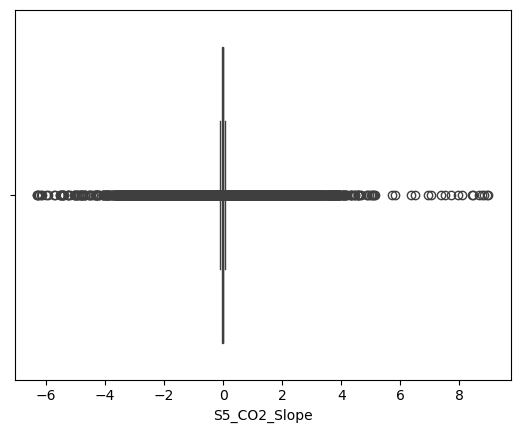

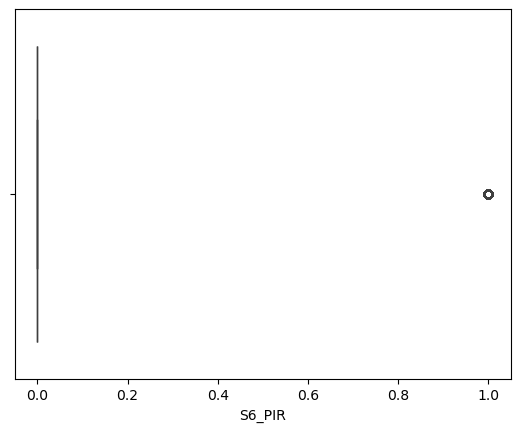

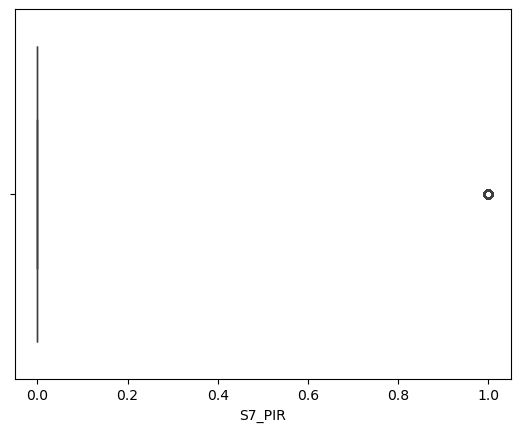

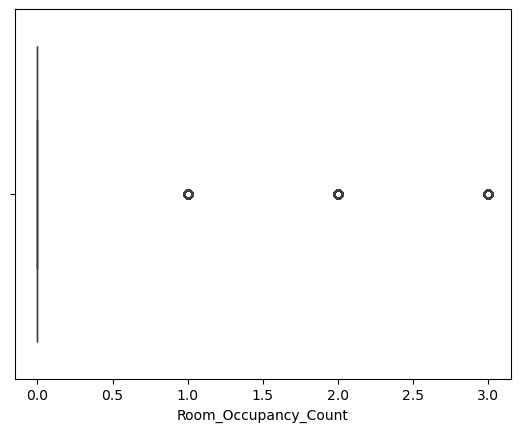

In [45]:
for i in df1.columns:
    sns.boxplot(data=num_columns,x=i)
    plt.show()

After Winsorization The Shape Data

In [47]:
df1.shape

(10129, 17)

#  VISUALIZATION FOR MORE INSIGHTS 

**HISTOGRAM with BELL CURVE -to  find the distridution of data and bell curve help to find the date have right skew or left skew or normal**

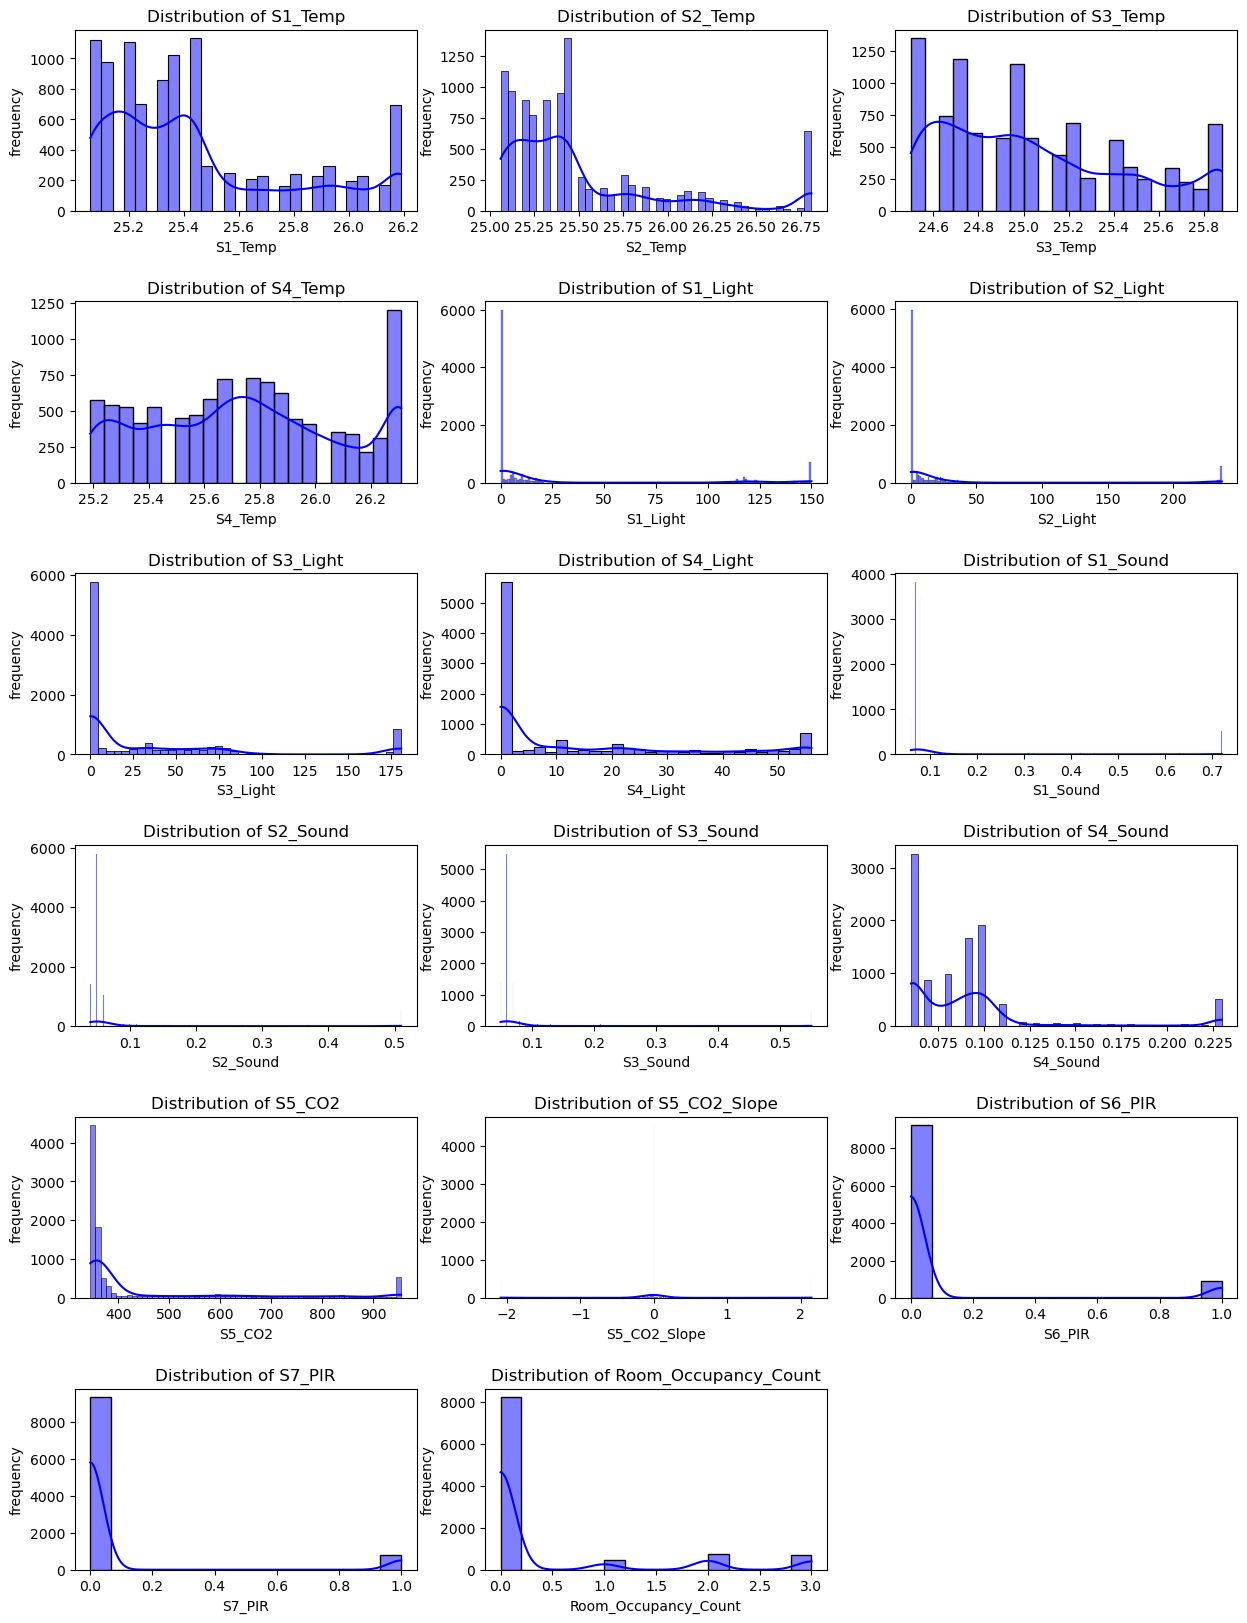

In [50]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(df1.columns,1):
    plt.subplot((len(df1.columns)+2)//3,3,i)
    sns.histplot(data=df1[column],kde=True,color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('frequency')
plt.subplots_adjust(hspace=0.5)

- From this graph, I recognize that there is some right skewness in the dataset.

**CORRILATION MAP- to find the relationship with other columns**

<Axes: >

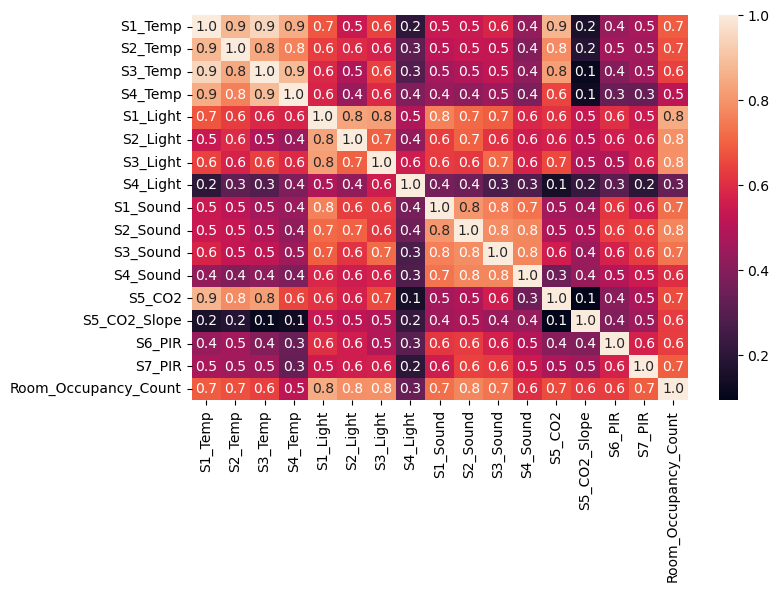

In [53]:
corr=df1.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,fmt='.1f',cbar=True)

**BAR CHART- to find the time more occupancy**

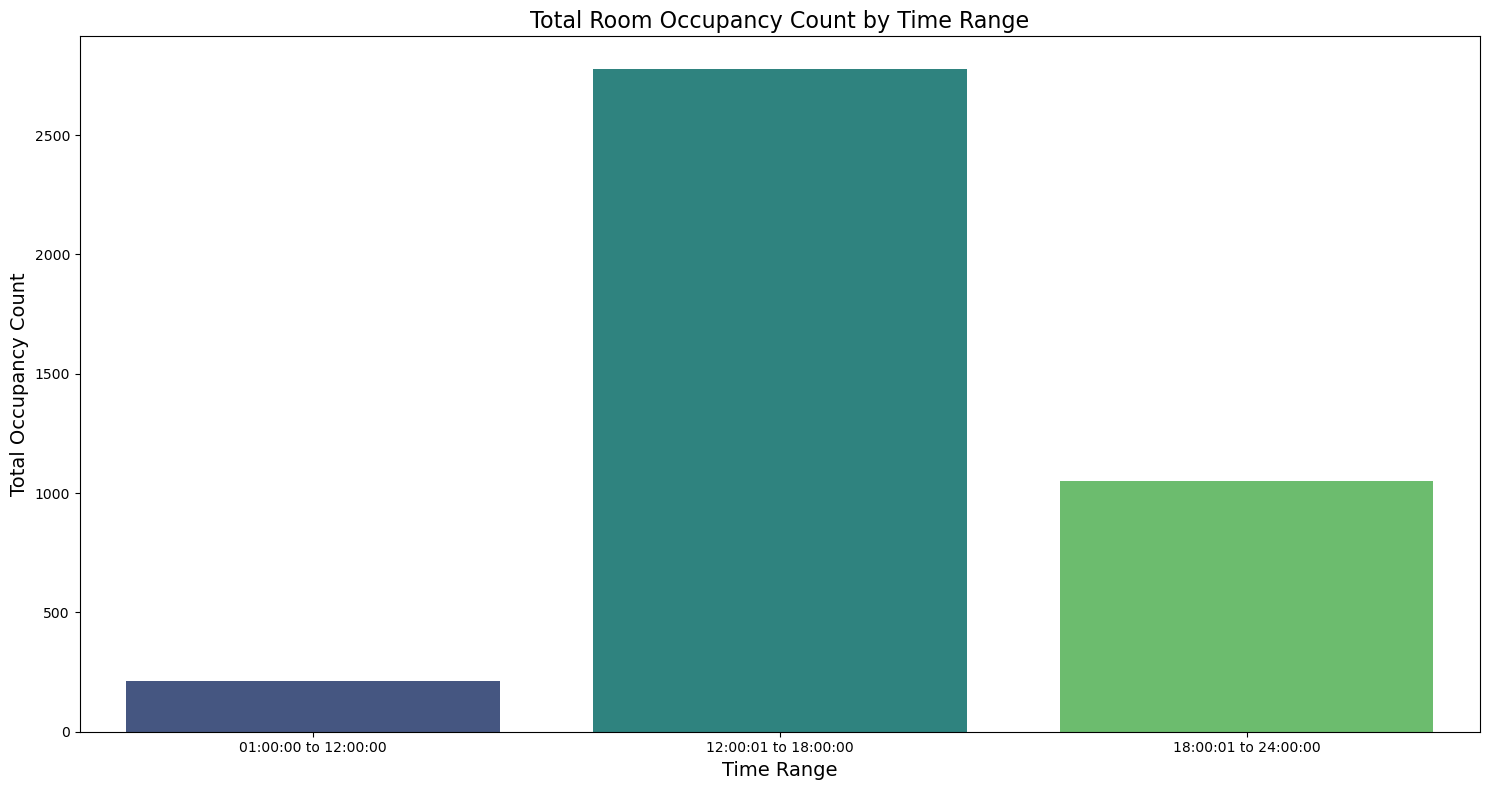

In [55]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

# Categorize time into ranges
data['Time_range'] = data['Time'].apply(
    lambda time: '01:00:00 to 12:00:00' if time.hour < 12 else
                 '12:00:01 to 18:00:00' if time.hour < 18 else
                 '18:00:01 to 24:00:00')

time_range_avg = data.groupby('Time_range')['Room_Occupancy_Count'].sum().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(y='Room_Occupancy_Count', x='Time_range', data=time_range_avg, palette='viridis')
plt.title('Total Room Occupancy Count by Time Range', fontsize=16)
plt.xlabel('Time Range', fontsize=14)
plt.ylabel('Total Occupancy Count', fontsize=14)
plt.tight_layout()
plt.show()

**PIE CHART - to find the distribution of traget veribles**

In [57]:
target= df1['Room_Occupancy_Count'].value_counts()

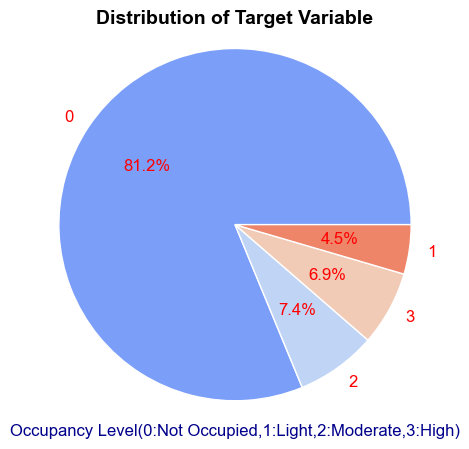

In [58]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5, 5))
colors = sns.color_palette("coolwarm", len(target))
plt.pie(target.values, labels=target.index, autopct="%1.1f%%",colors=colors,textprops={'fontsize': 12, 'color': 'red'})
plt.title( "Distribution of Target Variable",fontsize=14, color='black', weight='bold')
plt.text(0,-1.2,"Occupancy Level(0:Not Occupied,1:Light,2:Moderate,3:High)",fontsize=12,color='darkblue',ha='center')
plt.axis("equal")
plt.show()

- **The analysis of the Occupancy Estimation Dataset reveals a severe class imbalance**

**DATA TRANSFORMATION: Using  BOX- COX to reduce the skewness of data**

The Box-Cox transformation is a powerful technique used to stabilize variance and make the data more normally distributed, which is often beneficial for machine learning models that assume normality, such as linear regression.

In [62]:
df2= df1.copy()

for col in df2.columns:
    if (df1[col] > 0).all():
       df2[col], _ = boxcox(df1[col] + 1e-6) 

**Skewness After BOX-COX Transformation**

In [64]:
df_skew2= df2.skew()
df_skew2

S1_Temp                 0.000000
S2_Temp                 0.000000
S3_Temp                 0.000000
S4_Temp                 0.000000
S1_Light                1.795221
S2_Light                2.817636
S3_Light                1.836163
S4_Light                1.242749
S1_Sound                0.799964
S2_Sound                0.646988
S3_Sound                0.681554
S4_Sound                0.156455
S5_CO2                  0.000000
S5_CO2_Slope            0.034607
S6_PIR                  2.862811
S7_PIR                  3.107460
Room_Occupancy_Count    2.057635
dtype: float64

SHAPE OF DATA After BOX-COX

In [66]:
df2.shape

(10129, 17)

**TO DRAW A BELL CURVE THAT GIVES DISTRIBUTION AFTER NORMALIZATION**

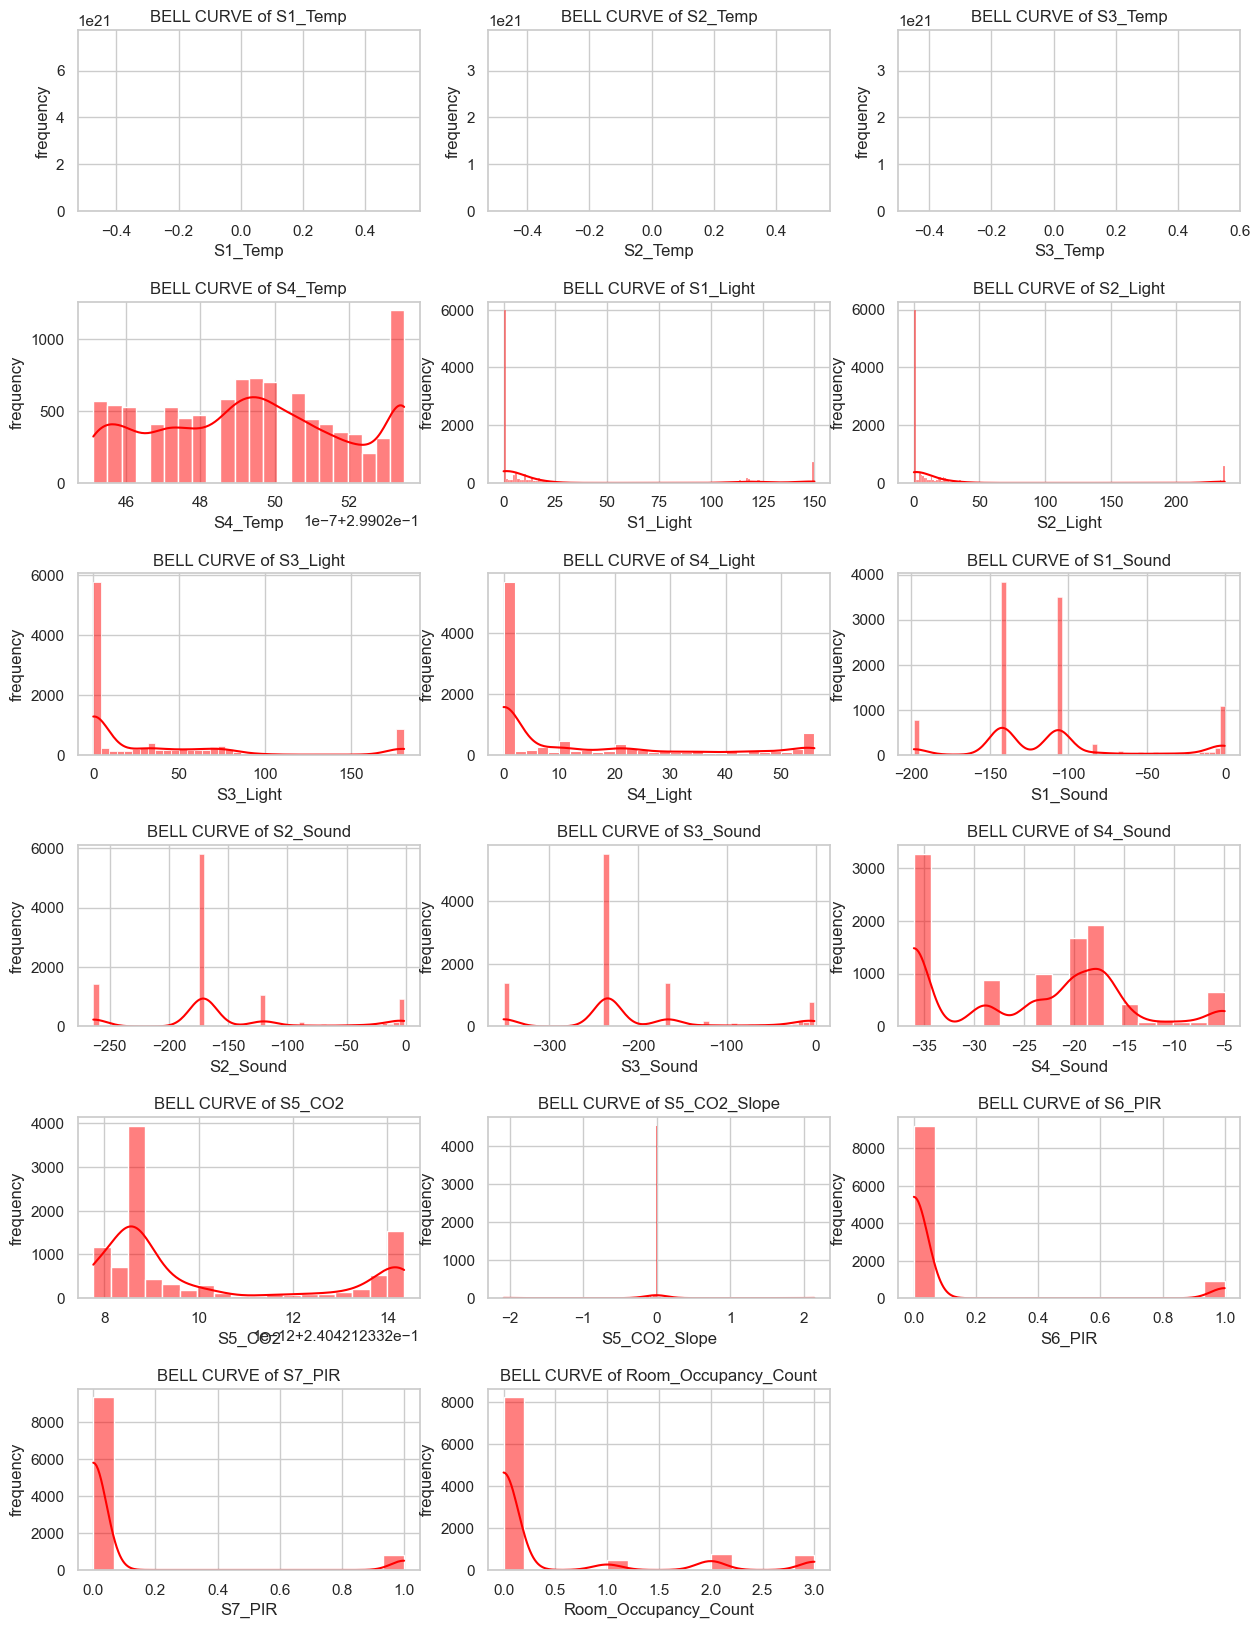

In [68]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(df2.columns,1):
    plt.subplot((len(df2.columns)+2)//3,3,i)
    sns.histplot(data=df2[column],kde=True,color='red')
    plt.title(f'BELL CURVE of {column}')
    plt.xlabel(column)
    plt.ylabel('frequency')
plt.subplots_adjust(hspace=0.5)

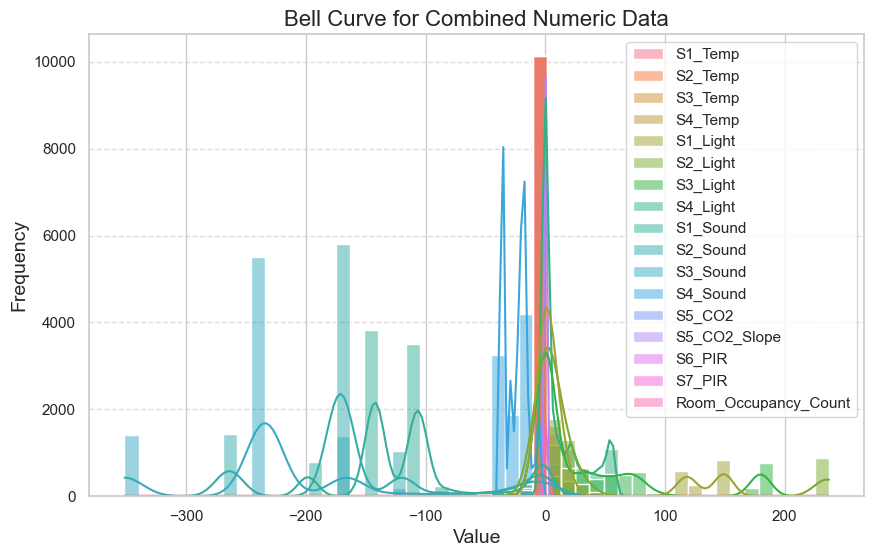

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df2, kde=True, color='blue', bins=50)
plt.title('Bell Curve for Combined Numeric Data', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [70]:
target_count= df2['Room_Occupancy_Count'].value_counts()
target_count

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

 #  **Feature Engineering:**- 

- In this dataset, there are no categorical features that require encoding. So, I am proceeding to the next step: Feature Selection

# **Feature Selection:**

The data set split into features (X) and target (y):

- X (Features): 16 numerical sensor readings, excluding date and time.
- y (Target): "Room_Occupancy_Count," representing occupancy levels.

In [75]:
X=df2.drop(['Room_Occupancy_Count'],axis=1)
y=df2['Room_Occupancy_Count']

In [76]:
X.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,0.025514,0.02405,0.050569,0.299025,121,34,53,40,-106.528553,-12.383778,-234.122941,-36.049976,0.240421,0.769231,0,0
1,0.025514,0.02405,0.050569,0.299025,121,33,53,40,-0.477752,-171.028341,-234.122941,-36.049976,0.240421,0.646154,0,0
2,0.025514,0.02405,0.050569,0.299025,121,34,53,40,-2.394864,-36.694008,-123.262720,-36.049976,0.240421,0.519231,0,0
3,0.025514,0.02405,0.050569,0.299025,121,34,53,40,-2.703738,-44.244128,-74.865833,-20.117147,0.240421,0.388462,0,0
4,0.025514,0.02405,0.050569,0.299025,121,34,54,40,-18.191435,-119.959923,-234.122941,-36.049976,0.240421,0.253846,0,0


In [77]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Room_Occupancy_Count, dtype: int64

In [78]:
X.shape

(10129, 16)

In [79]:
y.shape

(10129,)

**Select K Best- using for Feature Selection:**

In [81]:
select=SelectKBest(score_func=f_classif)
X_new=select.fit_transform(X,y)

- Selected Columns

In [83]:
X_selected= X.columns[select.get_support()]
X_selected

Index(['S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S1_Sound', 'S2_Sound',
       'S3_Sound', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'],
      dtype='object')

- statistical scores of each columns

In [85]:
feature_score=pd.DataFrame({'features':X.columns, 'score':select.scores_}).sort_values(by='score',ascending=False)
feature_score

,features,score
4,S1_Light,23307.088763
6,S3_Light,6256.386799
5,S2_Light,5928.670796
8,S1_Sound,5428.275224
9,S2_Sound,4709.865549
10,S3_Sound,4363.602346
15,S7_PIR,3392.170690
14,S6_PIR,2436.538045
13,S5_CO2_Slope,2236.133967
3,S4_Temp,1198.512526


- FROM THIS SCORE I AM GOING TO SELECT THE TOP 15 FEATURES

In [87]:
selecter= SelectKBest(score_func=f_classif,k=10)
X_features= selecter.fit_transform(X,y)

In [88]:
X_selected= X.columns[selecter.get_support()]
X_selected

Index(['S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S1_Sound', 'S2_Sound',
       'S3_Sound', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'],
      dtype='object')

In [89]:
X_new=X[X_selected]

#  **Split Data into Training and Testing Sets:**

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=42)

In [92]:
X_train.shape

(8103, 10)

In [93]:
X_test.shape

(2026, 10)

In [94]:
y_train.shape

(8103,)

In [95]:
y_train.value_counts()

Room_Occupancy_Count
0    6609
2     584
3     554
1     356
Name: count, dtype: int64

#  **Feature Scaling:**

In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**HANDLING IMBALANCE OF TARGET VARIABLE**

In [99]:
target_count= num_columns['Room_Occupancy_Count'].value_counts()
target_count

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

 **SMOTE((Synthetic Minority Oversampling Technique)**. 
 - I Am Going To Use Oversampling Technique
 - it will oversampling the minority in the training set

In [101]:
smote=SMOTE(random_state=42)

In [102]:
X_train_resambled,y_train_resambled=smote.fit_resample(X_train_scaled,y_train)

The Shape After Oversampling 

In [104]:
print(X_train_resambled.shape)
print(y_train_resambled.shape)

(26436, 10)
(26436,)


In [105]:
target_sum=y_train_resambled.value_counts()
target_sum

Room_Occupancy_Count
0    6609
3    6609
1    6609
2    6609
Name: count, dtype: int64

#   **Build the ML Model:**

In [107]:
models={
    'Logistic Regrassion': LogisticRegression(),
    'SVC':SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Gradient Boosting Classifier':GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# **Model Evaluation:**
- **Traning Each Model**

In [109]:
results={}
for model_name, model in models.items():
    model.fit(X_train_resambled,y_train_resambled)  #traning each model
    y_pred=model.predict(X_test_scaled)
    accuracy=accuracy_score(y_test,y_pred)       # evaluation score each model
    classification=classification_report(y_test,y_pred)
    confusion=confusion_matrix(y_test,y_pred)
    results[model_name]={ 'Accuracy Score':accuracy,
                        'Confusion Metrics':confusion,
                        'Classification Report': classification
        
    }


- **The Evaluation Score for Each Model**

In [111]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy Score: {result['Accuracy Score']}")
    print(f"Confusion Metrics:\n{result['Confusion Metrics']}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print("-" * 50)

Model: Logistic Regrassion
Accuracy Score: 0.9921026653504442
Confusion Metrics:
[[1614    0    0    5]
 [   0  103    0    0]
 [   0    1  158    5]
 [   3    0    2  135]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.96      0.98       164
           3       0.93      0.96      0.95       140

    accuracy                           0.99      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026

--------------------------------------------------
Model: SVC
Accuracy Score: 0.9925962487660415
Confusion Metrics:
[[1617    0    0    2]
 [   0  103    0    0]
 [   0    1  159    4]
 [   4    0    4  132]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99    

- **Evaluation Scores In a Table**

In [113]:
score=pd.DataFrame(results).T
score

,Accuracy Score,Confusion Metrics,Classification Report
Logistic Regrassion,0.992103,"[[1614, 0, 0, 5], [0, 103, 0, 0], [0, 1, 158, ...",precision recall f1-score ...
SVC,0.992596,"[[1617, 0, 0, 2], [0, 103, 0, 0], [0, 1, 159, ...",precision recall f1-score ...
Decision Tree Classifier,0.994571,"[[1619, 0, 0, 0], [0, 103, 0, 0], [0, 2, 158, ...",precision recall f1-score ...
Random Forest Classifier,0.995558,"[[1619, 0, 0, 0], [0, 103, 0, 0], [0, 1, 158, ...",precision recall f1-score ...
Gradient Boosting Classifier,0.994571,"[[1618, 0, 0, 1], [0, 103, 0, 0], [0, 1, 158, ...",precision recall f1-score ...
K-Nearest Neighbors,0.994571,"[[1616, 0, 0, 3], [0, 103, 0, 0], [0, 1, 160, ...",precision recall f1-score ...
Naive Bayes,0.943238,"[[1607, 0, 0, 12], [0, 98, 2, 3], [0, 0, 126, ...",precision recall f1-score ...


In [114]:
best_model_name = score["Accuracy Score"].idxmax()
best_model = results[best_model_name]["Accuracy Score"]

In [115]:
print(f"The model with the highest accuracy is {best_model:.6f}' with an accuracy score of {best_model_name}.")

The model with the highest accuracy is 0.995558' with an accuracy score of Random Forest Classifier.


- from the table The best model is **Random Forest Classifier** Accuracy Score **0.995558**

**Model Selection: Random Forest Classifier**

In [121]:
model=RandomForestClassifier(random_state=42)

# Overfitting Check using Cross-Validation

In [243]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print the cross-validation scores
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Scores: [0.94817374 0.99160908 0.98469891 0.97532083 0.9491358 ]
Mean Accuracy: 0.9698
Standard Deviation: 0.0180


- In your case, the mean accuracy of 0.9698 (97%) and - standard deviation of 0.0180 suggest that the Random Forest model is not overfitting and is performing consistently across different subsets of the data.

 # **Hyperparameter Tuning:**

 - I have achieved a better accuracy score for the Random Forest classifier model, so I do not need to perform **hyperparameter tuning**. Therefore, I will skip this section and proceed to the next step.

**MODEL Traning and Evaluation**

In [123]:
model.fit(X_train_resambled,y_train_resambled)  
y_pred=model.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)   
classification=classification_report(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)


In [124]:
print(accuracy)
print(confusion)
print(classification)

0.9955577492596249
[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  158    5]
 [   1    0    2  137]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.96      0.98       164
           3       0.96      0.98      0.97       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026



**ROC CURVES**

In [126]:
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

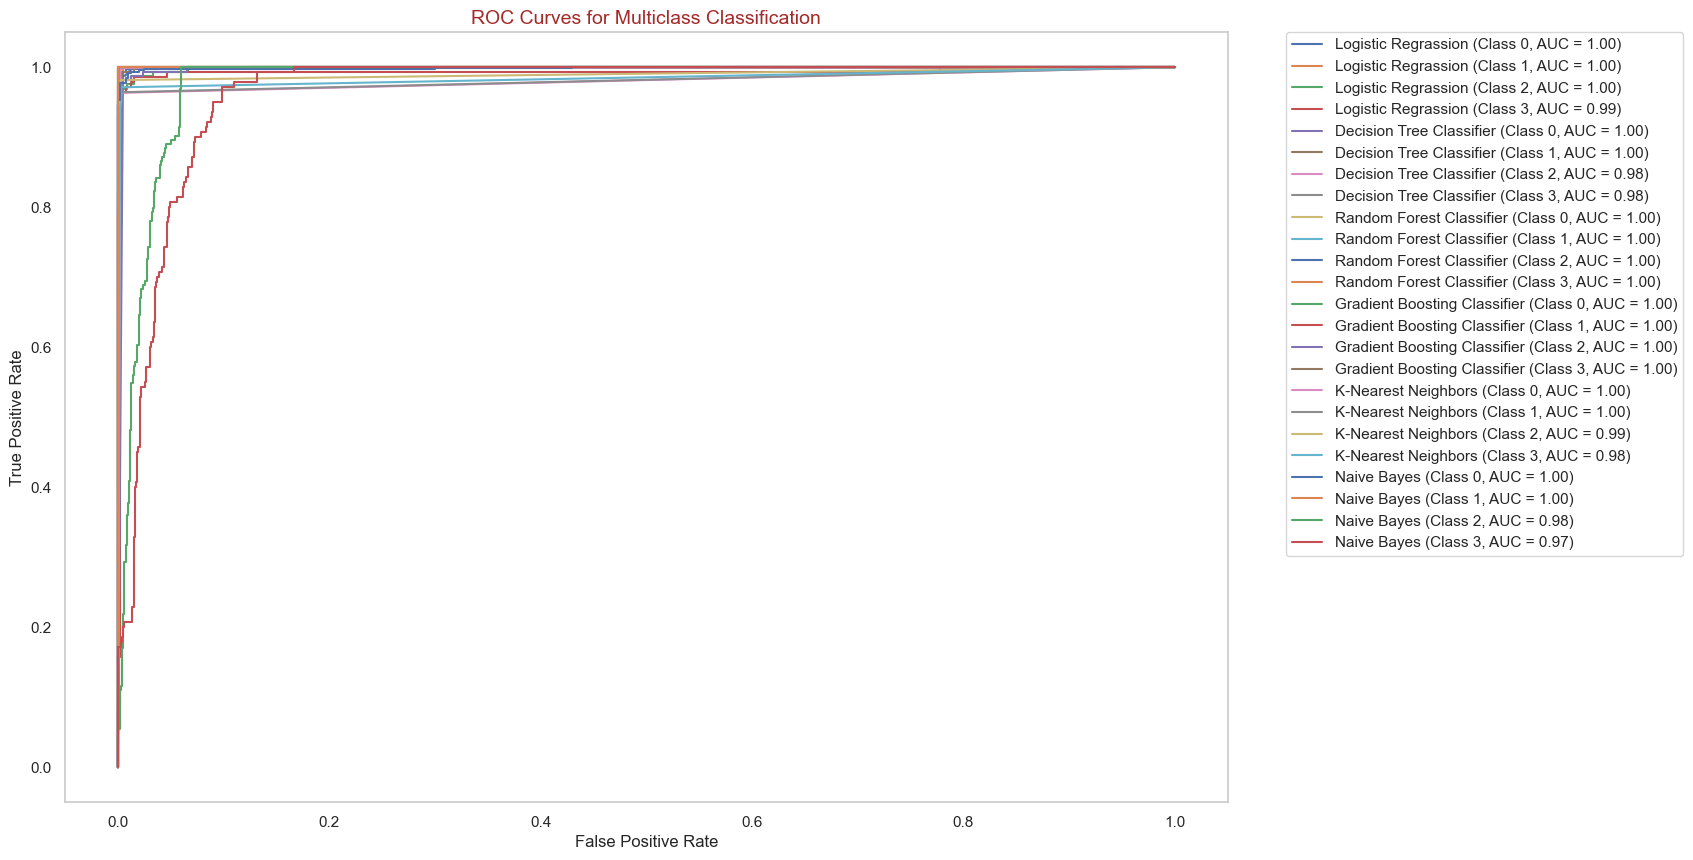

In [127]:
model_predictions = {model_name: model.predict_proba(X_test_scaled) for model_name, 
                     model in models.items() if hasattr(model, "predict_proba")}

plt.figure(figsize=(15, 10))
for model_name, y_pred_proba in model_predictions.items():
    for i in range(4):  
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f"{model_name} (Class {i}, AUC = {auc:.2f})")

plt.title("ROC Curves for Multiclass Classification",fontsize = 14,color ='brown')
plt.xlabel("False Positive Rate",fontsize =12)
plt.ylabel("True Positive Rate",fontsize = 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()

# Creating a Pipeline

- In this step, I will create a pipeline to streamline the data preprocessing and model training process. This will ensure that all transformations are applied consistently and improve workflow efficiency.

In [129]:
pipeline = ImbPipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
    ('scaler',StandardScaler()),
    ('imputer',SimpleImputer(strategy = 'median')),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model) 
])

In [130]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('feature_selection', SelectKBest()),
                ('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

# **Save the Model:**

In [132]:
joblib.dump(pipeline, 'room_occupancy_model_pipe.joblib')
print("Pipeline is saved as 'room_occupancy_model_pipe.joblib'")

Pipeline is saved as 'room_occupancy_model_pipe.joblib'


# Load Model

In [134]:
pipeline_load = joblib.load('room_occupancy_model_pipe.joblib')

# **Test with Unseen Data:**

In [136]:
Data_new_unseen=pd.read_csv("C:\\Users\\josep\\OneDrive\\Desktop\\Occupancy_Estimationn.csv")

In [137]:
Data_new_unseen.head()

,S4_Temp,S1_Light,S2_Light,S3_Light,S1_Sound,S2_Sound,S3_Sound,S5_CO2_Slope,S6_PIR,S7_PIR
0,25.38,121,34,53,0.08,0.19,0.06,0.769231,0,0
1,25.44,121,33,53,0.93,0.05,0.06,0.646154,0,0
2,25.44,121,34,53,0.43,0.11,0.08,0.519231,0,0
3,25.44,121,34,53,0.41,0.10,0.10,0.388462,0,0
4,25.44,121,34,54,0.18,0.06,0.06,0.253846,0,0


In [138]:
Data_new_unseen.shape

(10129, 10)

In [139]:
unseen_predicted=pipeline_load.predict(Data_new_unseen)
unseen_prob=pipeline_load.predict_proba(Data_new_unseen)

In [140]:
Data_new_unseen['predicted_value']=unseen_predicted
Data_new_unseen['unseen_prob'] = unseen_prob.max(axis=1)

# **Interpretation of Results**

In [142]:
Data_new_unseen.head()

,S4_Temp,S1_Light,S2_Light,S3_Light,S1_Sound,S2_Sound,S3_Sound,S5_CO2_Slope,S6_PIR,S7_PIR,predicted_value,unseen_prob
0,25.38,121,34,53,0.08,0.19,0.06,0.769231,0,0,1,0.91
1,25.44,121,33,53,0.93,0.05,0.06,0.646154,0,0,1,0.91
2,25.44,121,34,53,0.43,0.11,0.08,0.519231,0,0,1,0.91
3,25.44,121,34,53,0.41,0.10,0.10,0.388462,0,0,1,0.93
4,25.44,121,34,54,0.18,0.06,0.06,0.253846,0,0,1,0.98


**Data Shape After Prediction**

In [144]:
Data_new_unseen.shape

(10129, 12)

In [145]:
Data_new_unseen['Orginal_Room_Occupancy_Count']=df2['Room_Occupancy_Count']

**Bar Chart - prediction vs probabilities**

Text(0.5, 1.0, 'Bar Plot of Predicted Classes vs. Probabilities')

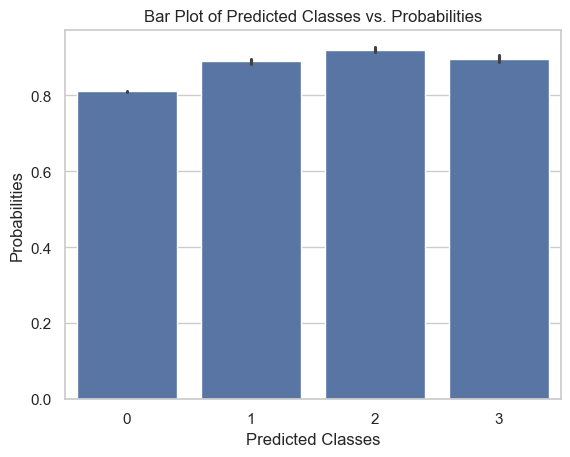

In [147]:
sns.barplot(x=Data_new_unseen['predicted_value'], y=Data_new_unseen['unseen_prob'])
plt.xlabel('Predicted Classes')  
plt.ylabel('Probabilities')   
plt.title('Bar Plot of Predicted Classes vs. Probabilities')

**Heat Map- True value and predicted value** 

In [149]:
conf_mat2=confusion_matrix(Data_new_unseen['Orginal_Room_Occupancy_Count'],Data_new_unseen['predicted_value'])

Text(0.5, 22.249999999999993, 'predicted label')

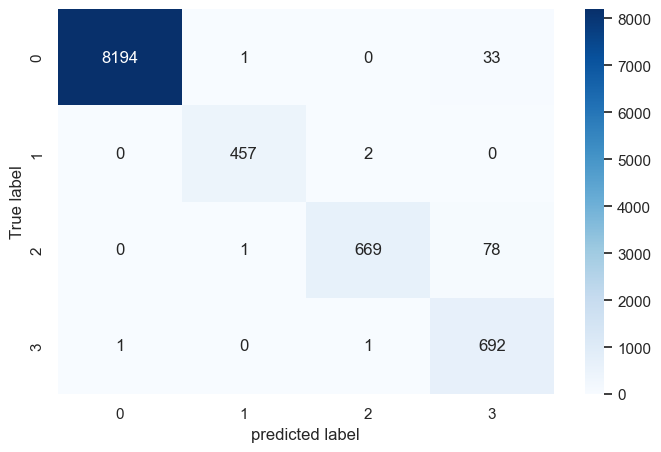

In [150]:
plt.figure(figsize=(8,5))
sns.heatmap(conf_mat2,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True label')
plt.xlabel('predicted label')

# **Conclusion:** 

This project successfully demonstrates the application of machine learning for room occupancy estimation using non-intrusive environmental sensor data. The classification model performed well in predicting different occupancy levels, achieving high accuracy with minimal misclassifications. The confusion matrix analysis indicates that the model effectively distinguishes between empty and occupied rooms, with some misclassification between closely related occupancy levels (e.g., 2 and 3 occupants).

The ability to accurately estimate room occupancy has significant real-world implications, particularly in smart building management, energy efficiency, and security. By leveraging environmental data such as temperature, light, sound, CO₂ levels, and PIR motion sensors, this model provides a data-driven approach to optimizing space utilization, automating HVAC control, and enhancing building security.


**Overall Model Performance:**

- The high accuracy and low misclassification rates suggest that the model effectively predicts occupancy levels.

- The most significant misclassification occurs between Class 2 and Class 3, likely due to overlapping feature distributions.
  
- The model performs exceptionally well for Class 0 (empty room), which is crucial for energy efficiency in smart building applications.
  
**Future Improvements:**
  
- Feature Engineering: Refining input variables to enhance distinction between occupancy levels.

- Threshold Optimization: Adjusting classification thresholds to minimize confusion between Class 2 and Class 3.
 
- Advanced Models: Exploring deep learning or ensemble methods for improved accuracy.
- 
**Final Thoughts:**
  
The results confirm that the machine learning model is highly effective for room occupancy classification, making it a valuable tool for smart building management, energy optimization, and automated control systems. With minor refinements, it can achieve even greater accuracy and robustness in real-world applications.

**Data Save After Prediction**

In [152]:
Data_new_unseen.to_csv('predicted_results.csv', index=False)